# Iterating

Using the recipe as an analogy, we can see that there is a step that requires repeating the action of putting [`n`] number of ice-cream, whipped cream, cherry (`IWC`) portions onto the banana

![programming_5.png](images/programming_5.png)

Iteration or looping allows us to 
- go through a data structure one element at a time (e.g. sequence/vector/list)
- repeat the execution of a piece of code until all the elements have been covered

This allows us to simplify writing code that performs repeated operations

---
## Data preparation

To illustrate the use of iteration/looping, we will use an example data frame with patient data

In [ ]:
df <- data.frame(id=c(20201,20205,20212,20213,20216),
                 age=c(19,45, 23, 55, 65), 
                 name=c("Alice","Bob","Charlie","David", "Eliza"),
                 risk=c("low", "med", "high", "high","med"))

df

Let us take patient from the data frame and use the conditional statement to determine whether the patient should be admitted or reviewed later 

In [ ]:
# select by row index

person <- df[3,] # David

person

In [ ]:
# combining comparisons into single if statement

if (person$age >50 | person$risk=="high") { 
    print("admit")
} else { 
    print("review later")
}

What if we want to repeat the action for all the patients in the dataframe?
- We could do it manually by repeating the code and changing the ```person``` variable for each patient
- We could automate it using iteration/looping statements

---
## Iterating/looping using the ```for``` statement

We use the ```for``` statement to iterate through a data structure containing multiple elements

![for.png](images/for.png)

For each iteration, the contents of the current element of the data structure are assigned to the ```variable``` in the ```for``` statement
- The variable name can be chosen to represent a _unit from the data structure that is being iterated_ upon e.g. 
  - ```index``` (variable) **in** ```sequence``` (sequence)
  - ```patient``` (variable) **in** ```patient_list``` (list)
  - ```name``` (variable) **in** ```patient_names``` (vector)
- The contents of the variable stay _within_ the ```{ do something }``` block and be used for operations

![for_variable.png](images/for_variable.png)
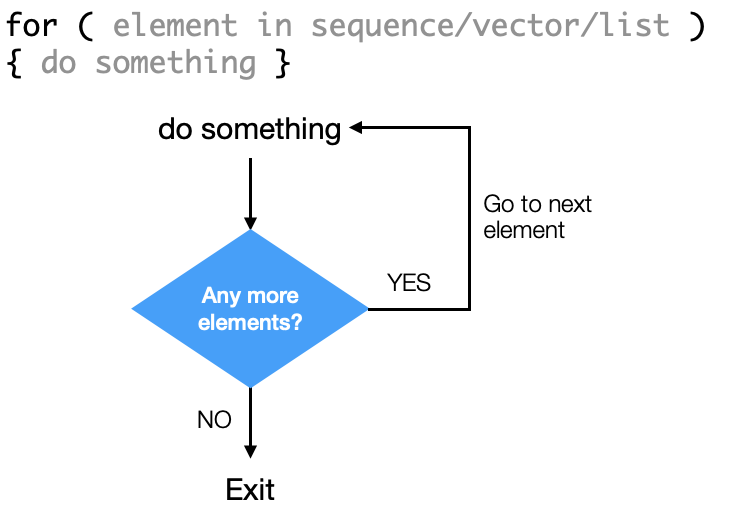
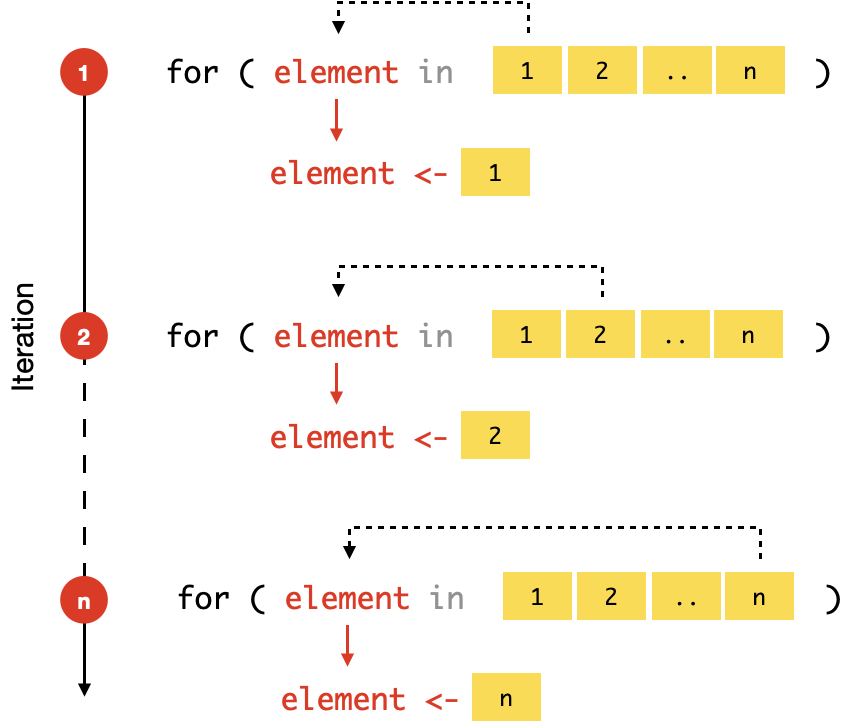

### 1. Using a sequence

We can use the ```start:end``` syntax to generate a sequence of numbers that can be iterated

In [ ]:
num_cases <- nrow(df) # count number of rows (1 row = 1 patient)

for (index in 1:num_cases) {    # sequence of numbers from 1 to num_cases

    person <- df[index,]        # select the patient by the index
    
    if (person$age >50 | person$risk=="high") { 
    print("admit")
    } else { 
    print("review later")
    }

    
}

### 2. Using a vector

We can iterate through the contents of a vector that contains row a identifier. This could be
- `rownames` (by default, rows are in sequential order 1,2,3..)
- a `column with unique row identifier` in the data frame

The benefit of using the method is that we do not need to generate the sequence of indexes as R will iterate thru the vector 

First, let us look at using **row names**

In [ ]:
# using the rownames function to a return a vector of names
rownames(df)

Now that we have a vector, we can iterate through it and use it to reference each row in the data frame e.g. `df[r,]` where `r = row index`

In [ ]:
for (row in rownames(df)) {
    
    person <- df[row,] # using row names to index the person
    
    if (person$age >50 | person$risk=="high") { 
    print("admit")
    } else { 
    print("review later")
    }
    
}

Instead of using `rownames` to populate the vector with all the row indexes in the data frame, we can specify selective row indexes in the vector
- For example we would like to select patients under our care (rows 1,2,5)

In [ ]:
# manually specifying the rows in a vector

patients_in_my_care <- c(1,2,5)

for (patient in patients_in_my_care) {
    
  person <- df[patient,]
    
    if (person$age >50 | person$risk=="high") { 
    print("admit")
    } else { 
    print("review later")
    }
    
}

We can also use a unique row identifier from the data frame. Here, we can use the `id` column containing unique identifiers for each patient
- To do this, we need to populate the vector with the identifiers from the data frame (`id`)
- In the loop, the each `id` value is used to select rows from the data frame

In [ ]:
# vector of patient identifiers

df$id

In [ ]:
# using a column containing unique identifiers

pt_ids <- df$id

for (pt_id in pt_ids) {
    
  person <- df[df$id == pt_id,] # we will select rows where pt_id matches the id
    
    if (person$age >50 | person$risk=="high") { 
    print("admit")
    } else { 
    print("review later")
    }
    
}

---
## Summary
- Repetitive steps can be done using a loop that iterates through a sequence/vector/list
- Iteration is defined as `for(element in sequence/vector/list) { code to execute }`
  - The first element in a sequence/vector/list is assigned to the variable `element` (you can choose any variable name that denotes a single element of interest)
  - When the code block has finished executing, the next element is assigned to the same variable `element` and the code is executed again
  - The process continues until it reaches the last element in the sequence/vector/list

---
## Exercise - Iteration

In [ ]:
screen_df <- data.frame(id=c(20201,20205,20212,20213,20216),
                 age=c(19,45, 23, 55, 65),
                 sysBP=c(120,150,130,65,155),
                 contact=c(T,F,T,F,F),
                 cluster=c(T,T,F,T,F))
    
screen_df

Repeat the conditional checking for all the patients. Use the `id` column to iterate through the patients
- if systolic BP is less than 80, print "send to ED"
- otherwise if patient has contact or stays near a cluster, print "send for screening"
- otherwise if patient if older than 65, print "review in 3 days"
- if they do no meet any of these criteria, print "review in 1 week"

In [ ]:
# start here

In [ ]:
# solution

patient_ids <- screen_df$id

for (patient_id in patient_ids) {

        pt <- screen_df[screen_df$id == patient_id, ] # select pt from dataframe using the id

        if (pt$sysBP < 80) {
            print("send to ED")
        } else if (pt$contact==T | pt$cluster ==T) {
            print("send for screening")
        } else if (pt$age >65) {
            print("review in 3 days")
        } else {
            print("review in 1 week")
        }
    }
